In [92]:
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import scipy

# 1. Import Data

In [93]:
def get_images(tar_file, test=False):
    # upack the tar file
    tar = tarfile.open(tar_file)
    tar.extractall()
    tar.close()
    # load the images
    if test:
        images = np.load('images0.npy', allow_pickle=True)
    else:
        images = np.load('images.npy', allow_pickle=True)
    return images

In [94]:
images = get_images('em_data.tar', test=True)
avg_img = np.average(images, axis=0)

In [95]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

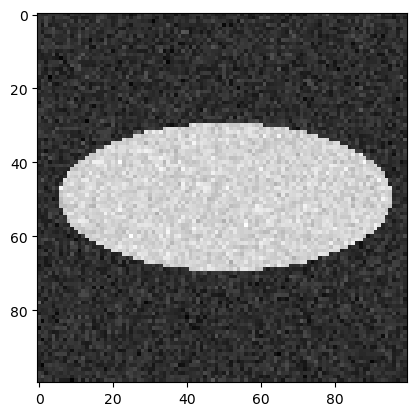

In [96]:
plot_image(avg_img)

##  Implementation of the EM algorithm for 2D data
### The distribution of the data comes from Bernoulli distributions
The probability distribution for binary images x parametrised by the shape s and the
tuple $ η = (η_0, η_1) $ is given by $ p(x; s, η) = \prod_{i=1}^s p_b(xi; η_i(s)) $ 

# 2. Assignment 1

### Bernoulli distribution $ p_b(z; η) $ for $ z ∈ B $ is given by $ log p_b(z) = ηz − log(1 + eη) $

In [97]:
def bernoulli(z, eta):
    return eta * z - np.log(1 + np.exp(eta))

## EM algorithm
### E-step

In [98]:
def e_step(avg_image, estimated_img, eta_0, eta_1):
    # compute the likelihoods
    likelihoods = (estimated_img * (avg_image * eta_1 - np.log(1 + np.exp(eta_1))) +
                   (1 - estimated_img) * (avg_image * eta_0 - np.log(1 + np.exp(eta_1))))
    # compute the average likelihood
    likelihood_avg = np.sum(likelihoods) / np.size(likelihoods)
    # compute the number of 0 and 1 pixels
    n_1 = np.sum(estimated_img)
    n_0 = estimated_img.shape[0] * estimated_img.shape[1] - n_1
    return n_0, n_1, likelihoods, likelihood_avg

### M-step

In [99]:
def m_step(avg_image, estimated_img, n_0, n_1):
    # initialise the parameters
    etas_0 = 1 / n_0 * np.sum(avg_image * (1 - estimated_img))
    etas_1 = 1 / n_1 * np.sum(avg_image * estimated_img)
    # return the parameters
    return etas_0, etas_1

### EM algorithm

In [100]:
def shape_mle(avg_image, ethas_init):
    estimated_img = np.random.randint(2, size=avg_image.shape)
    # initialise the parameters
    eta_0 = ethas_init[0]
    eta_1 = ethas_init[1]

    # set up a counter and a likelihood
    epsilon = 100
    n_iterations = 100
    i = 0
    # loop over the iterations
    while i < n_iterations and abs(epsilon) > 0.01:
        # E-step
        n_0, n_1, likelihoods, likelihood = e_step(avg_image, estimated_img, eta_0, eta_1)
        average_pixel = np.sum(likelihoods) / np.size(likelihoods)
        # compute the new image
        estimated_img = np.zeros(avg_image.shape)
        estimated_img[likelihoods >= average_pixel] = 1
        # M-step
        new_eta_0, new_eta_1 = m_step(avg_image, estimated_img, n_0, n_1)
        epsilon = (new_eta_0 + new_eta_1) - (eta_0 + eta_0)
        eta_0 = new_eta_0
        eta_1 = new_eta_1
        # increment the counter
        i += 1
    # return the estimated image and the parameters
    return estimated_img, [eta_0, eta_1]

In [101]:
# initialise the parameters
etas = [0, 1]
avg_image = np.average(images, axis=0)

In [102]:
estimated_img, etas = shape_mle(avg_image, etas)

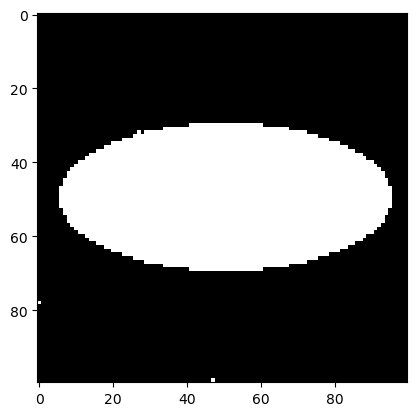

Estimated etas :  [0.5808666126089601, 0.33576139727649496]


In [103]:
plot_image(estimated_img)
print("Estimated etas : ", etas)

# 3. Assignment 2

In [104]:
images = get_images("em_data.tar")
avg_img = np.average(images, axis=0)

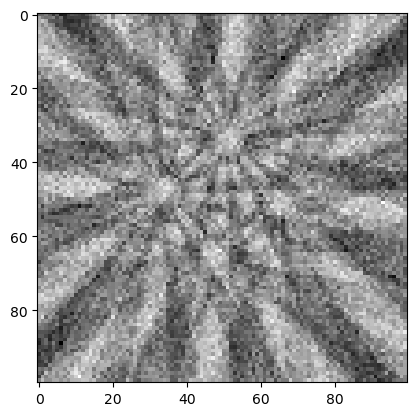

In [105]:
plot_image(avg_img)